In [1]:
# This cell just imports the relevant modules

import numpy as np
from math import pi, exp
from sympy import sin, cos, Function, Symbol, diff, integrate, dsolve, checkodesol, solve, ode_order, classify_ode, pprint
import mpmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Order of an ODE

Lecture 7, slide 9

Use sympy to define dependent and independent variables, constants, ODE, and to find the order of ODEs.

In [ ]:
t = Symbol('t') # Independent variable
eta = Symbol('eta') # Constant
v = Function('v') # Dependent variable v(t)
ode = diff(v(t),t) + eta*v(t) # The ODE we wish to solve. Make sure the RHS is equal to zero.
print("ODE #1:") 
pprint(ode)
print("The order of ODE #1 is %d" % ode_order(ode, v(t))) 

x = Function('x') # Dependent variable x(t)
m = Symbol('m') # Constant
k = Symbol('k') # Constant
ode = m*diff(x(t),t,2) + k*x(t)
print("ODE #2:") 
pprint(ode)
print("The order of ODE #2 is %d" % ode_order(ode, x(t))) 

y = Function('y') # Dependent variable y(t)
ode = diff(y(t),t,4) - diff(y(t),t,2)
print("ODE #3:") 
pprint(ode)
print("The order of ODE #3 is %d" % ode_order(ode, y(t))) 

# Analytical solutions

Lecture 7, slide 14

Solving ODEs analytically using sympy.dsolve

In [ ]:
x = Symbol('x') # Independent variable
y = Function('y') # Dependent variable y(x)

# The ODE we wish to solve. Make sure the RHS is equal to zero.
ode = diff(y(x),x) - 2*x*(1-y(x))
solution = dsolve(ode, y(x)) # Solve the ode for function y(x).
print("ODE #4:") 
pprint(ode)
print("The solution to ODE #4 is: ", solution) 

In [ ]:
x_3d = np.arange(-5, 5, 0.01)
y_3d = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_3d, y_3d)

dydx = 2 * X * (1-Y)

x = np.linspace(-5, 5, 1000)

y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = 1 + exp(-x[i]**2)



fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, dydx, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_zlabel('dy/dx')
ax1.set_title('dy/dx = 2x(1-y)', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, 'k', label='y(x) = 1 + exp(-x**2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title("Solution to ODE 4", fontsize=14)
ax2.legend(loc='best')
ax2.grid(True)

plt.show()

```{note}

The function checkodesol checks that the result from dsolve is indeed a solution to the ode. Basically, it 
substitutes in 'solution' into 'ode' and checks that the RHS is zero. If it is, the function returns 'True'.

```

In [ ]:
print("Checking solution using checkodesol...") 
check = checkodesol(ode, solution)

print("Output from checkodesol:", check)

if(check[0] == True):
    print("y(x) is indeed a solution to ODE #4") 
else:
    print("y(x) is NOT a solution to ODE #4") 

```{note}

The mpmath module can handle initial conditions (x0, y0) when solving an initial value problem, using the 
odefun function. However, this will not give you an analytical solution to the ODE, only a numerical solution.

```

In [ ]:
f = mpmath.odefun(lambda x, y: 2*x*(1-y), x0=0, y0=2)

# compares the numerical solution f(x) with the values of the (already known) analytical solution 
# between x=0 and x=10
for x in np.linspace(0, 10, 101):
    print("x=%.1f" % (x), ",", f(x), ",", 1+exp(-x**2))

# Separation of variables

Lecture 7, slide 20

Solving ODE through separation of variables in Python using sympy.dsolve

In [ ]:
x = Symbol('x') # Independent variable
y = Function('y') # Dependent variable y(x)

# The ODE we wish to solve.
ode = (1.0/y(x))*diff(y(x),x) - cos(x)
print("ODE #5:") 
pprint(ode)

# Solve the ode for function y(x).using separation of variables.
solution = dsolve(ode, y(x), hint='separable')
print("The solution to ODE #5 is: ", solution) 

```{note}

Note that the optional 'hint' argument here has been used to tell SymPy how to solve the ODE. However, it is usually smart enough to work it out for itself.

```

In [ ]:
x_3d = np.arange(-5, 5, 0.01)

y_3d = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_3d, y_3d)

dydx = Y * np.cos(X) 

x = np.linspace(-5, 5, 1000)

y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = exp(sin(x[i]))

    
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, dydx, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_zlabel('dy/dx')
ax1.set_title('dy/dx = ycos(x)', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, 'k', label='y(x) = exp(sin(x))')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title("Solution of ODE 5", fontsize=14)
ax2.legend(loc='best')
ax2.grid(True)

plt.show()

# Integration factor

Lecture 7, slide 23

In [ ]:
x = Symbol('x') # Independent variable
y = Function('y') # Dependent variable y(x)
# The ODE we wish to solve.
ode = diff(y(x),x) - 2*x + 2*x*y(x)
print("ODE #6:") 
pprint(ode)
# Solve the ode for function y(x).using separation of variables
solution = dsolve(ode, y(x))
print("The solution to ODE #6 is: ", solution) 

# Application

### Radioactive decay

Lecture 7, slide 26

In [ ]:
t = Symbol('t') # Independent variable
N = Function('N') # Dependent variable N(t)
l = Symbol('l') # Constant
# The ODE we wish to solve.
ode = diff(N(t),t) + l*N(t)
print("ODE #7:") 
pprint(ode)
solution = dsolve(ode, N(t))
print("The solution to ODE #7 is: ", solution) 

Example: At t=0, 1 mole of carbon-14 starts to decay

In [ ]:
3600*24*365.25*5700

In [ ]:
l = 3.8394e-12 # decay constant of C-14

# 1 mole = 6.02*10**23 nuclei
C = 6.02e23 * exp(l) # rearrange solution to calculate constant C1 from initial conditions

# half-life of C-14 = 5700 years = 1.8e11 seconds
t_3d = np.arange(0, 1e12, 1e9) # 1000 values of t

n_3d = np.arange(0, 6.02e23, 6.02e20) # 1000 values of N

N, T = np.meshgrid(n_3d, t_3d)

dNdt = -l * N


t = np.arange(0, 1e12, 1e9) 

n = np.zeros(len(t))
for i in range(len(t)):
    n[i] = C * exp(-l*t[i])
    
t = t/(3600*24*365.25) # convert seconds to years
n = n/6.02e23 # convert number of C-14 nuclei to number of moles
    
    
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(T, N, dNdt, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('t')
ax1.set_ylabel('N(t)')
ax1.set_zlabel('dN/dt')
ax1.set_title('Rate of change in number of C-14 nuclei', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(t, n, 'k', label='N(t) = Cexp(-lt)')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Number of moles of C-14 nuclei')
ax2.set_title("Number of C-14 nuclei over time", fontsize=14)
ax2.legend(loc='best', fontsize=12)
ax2.grid(True)

plt.show()

```{note}

The plane in the first graph shows that radioactive decay is independent of time, only dependent on the number of radioactive nuclei present.

```

### Particle settling

Lecture 7, slide 31

In [14]:
t = Symbol('t') # Independent variable - time
v = Function('v') # Dependent variable v(t) - the particle velocity
# Physical constants
rho_f = Symbol('rho_f') # Fluid density
rho_p = Symbol('rho_p') # Particle density
eta = Symbol('eta') # Viscosity
g = Symbol('g') # Gravitational acceleration
a = Symbol('a') # Particle radius
# The ODE we wish to solve.
ode = diff(v(t),t) - ((rho_p - rho_f)/rho_p)*g + (9*eta/(2*(a**2)*rho_p))*v(t)
print("ODE #8:") 
pprint(ode)
solution = dsolve(ode, v(t))
print("The solution to ODE #8 is: ", solution) 

ODE #8:
  g⋅(-ρ_f + ρₚ)   d          9⋅η⋅v(t)
- ───────────── + ──(v(t)) + ────────
        ρₚ        dt            2    
                             2⋅a ⋅ρₚ 
The solution to ODE #8 is:  Eq(v(t), (-2*a**2*g*rho_f + 2*a**2*g*rho_p + exp(eta*(C1 - 9*t/(2*a**2*rho_p))))/(9*eta))


Example: quartz grain with density 2650kg/m3 and radius 1cm sinking in water.

Initial conditions: v=0 when t=0

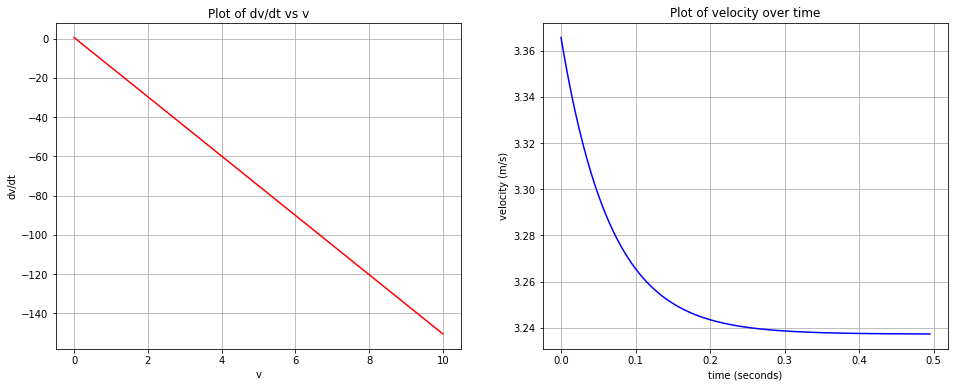

In [9]:
rho_f = 1000
rho_p = 2650
eta = 0.89
g = 9.81
a = 1e-2

C = -(2*a**2*rho_p)/(9*eta) * np.log((rho_p-rho_f)/rho_p)

v_ode = np.linspace(0, 10, 1000)
dvdt = (rho_p-rho_f)/rho_p - (9*eta*v_ode)/(2*a**2*rho_p)

seconds = np.arange(0, 0.5, 0.005)
velocity = np.zeros(len(seconds))
for i in range(len(seconds)):
    velocity[i] = -2*a**2*g*rho_f + 2*a**2*g*rho_p + exp(eta*(C - 9*seconds[i]/(2*a**2*rho_p)))/(9*eta)



fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121)
ax1.plot(v_ode, dvdt, 'r')
ax1.set_xlabel('v')
ax1.set_ylabel('dv/dt')
ax1.set_title("Plot of dv/dt vs v")
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(seconds, velocity, 'b')
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_title("Plot of velocity over time")
ax2.grid(True)

plt.show()